In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns

np.random.seed(500)

In [2]:
types_names = {90:'Ia', 67: '91bg', 52:'Iax', 42:'II', 62:'Ibc', 
               95: 'SLSN', 15:'TDE', 64:'KN', 88:'AGN', 92:'RRL', 65:'M-dwarf',
               16:'EB',53:'Mira', 6:'MicroL', 991:'MicroLB', 992:'ILOT', 
               993:'CART', 994:'PISN',995:'MLString'}

SNANA_types = {90:11, 62:{1:3, 2:13}, 42:{1:2, 2:12, 3:14},
               67:41, 52:43, 64:51, 95:60, 994:61, 992:62,
               993:63, 15:64, 88:70, 92:80, 65:81, 16:83,
               53:84, 991:90, 6:{1:91, 2:93}}

SNANA_names = {11: 'Ia', 3:'Ibc', 13: 'Ibc', 2:'II', 12:'II', 14:'II',
               41: '91bg', 43:'Iax', 51:'KN', 60:'SLSN', 61:'PISN', 62:'ILOT',
               63:'CART', 64:'TDE', 70:'AGN', 80:'RRL', 81:'M-dwarf', 83:'EB',
               84:'Mira', 90:'MicroLB', 91:'MicroL', 93:'MicroL'}

In [3]:
fname = '/media/RESSPECT/data/PLAsTiCC/PLAsTiCC_zenodo/plasticc_test_metadata.csv'
test_metadata = pd.read_csv(fname)

In [4]:
ddf_flag = test_metadata['ddf_bool'].values == 1

In [5]:
ids_ddf = test_metadata['object_id'].values[ddf_flag]
ids_wfd = test_metadata['object_id'].values[~ddf_flag]

# Check how are the Ias in DDF in comparison with WFD


In [6]:
fnames_Ia = os.listdir('Ia/results/')

fnames_Ia.remove('master_fitres.fitres')
fnames_Ia.remove('salt3')
fnames_Ia.remove('.ipynb_checkpoints')

salt2_wfd = []

for name in fnames_Ia:
    fitres_temp = pd.read_csv('Ia/results/' + name, delim_whitespace=True, 
                              comment='#')
    salt2_wfd.append(fitres_temp)

salt2_Ia_wfd = pd.concat(salt2_wfd, ignore_index=True)

salt2_Ia_ddf = pd.read_csv('Ia/results/master_fitres.fitres', comment='#', delim_whitespace=True)

In [7]:
salt2_Ia_ddf['x1 - SIM_x1'] = salt2_Ia_ddf['x1'] - salt2_Ia_ddf['SIM_x1']
salt2_Ia_ddf['c - SIM_c'] = salt2_Ia_ddf['c'] - salt2_Ia_ddf['SIM_c']
salt2_Ia_ddf['x0 - SIM_x0'] = salt2_Ia_ddf['x0'] - salt2_Ia_ddf['SIM_x0']
salt2_Ia_ddf['mB - SIM_mB'] = salt2_Ia_ddf['mB'] - salt2_Ia_ddf['SIM_mB']

salt2_Ia_wfd['x1 - SIM_x1'] = salt2_Ia_wfd['x1'] - salt2_Ia_wfd['SIM_x1']
salt2_Ia_wfd['c - SIM_c'] = salt2_Ia_wfd['c'] - salt2_Ia_wfd['SIM_c']
salt2_Ia_wfd['mB - SIM_mB'] = salt2_Ia_wfd['mB'] - salt2_Ia_wfd['SIM_mB']
salt2_Ia_wfd['x0 - SIM_x0'] = salt2_Ia_wfd['x0'] - salt2_Ia_wfd['SIM_x0']

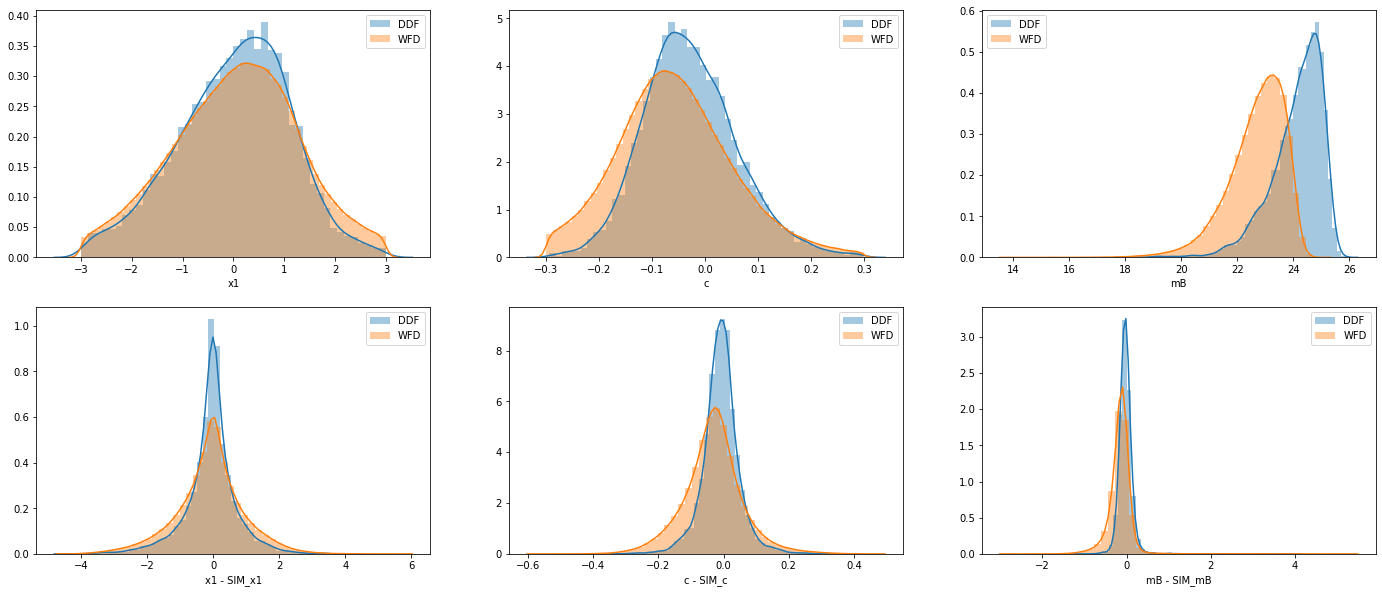

In [8]:
plt.figure(figsize=(24,10))

ax1 = plt.subplot(2,3,1)
sns.distplot(salt2_Ia_ddf['x1'], label='DDF', ax=ax1)
sns.distplot(salt2_Ia_wfd['x1'], label='WFD', ax=ax1)
plt.legend()

ax2 = plt.subplot(2,3,2)
sns.distplot(salt2_Ia_ddf['c'], label='DDF', ax=ax2)
sns.distplot(salt2_Ia_wfd['c'], label='WFD', ax=ax2)
plt.legend()

ax3 = plt.subplot(2,3,3)
sns.distplot(salt2_Ia_ddf['mB'], label='DDF', ax=ax3)
sns.distplot(salt2_Ia_wfd['mB'], label='WFD', ax=ax3)
plt.legend()

ax4 = plt.subplot(2,3,4)
sns.distplot(salt2_Ia_ddf['x1 - SIM_x1'], label='DDF', ax=ax4)
sns.distplot(salt2_Ia_wfd['x1 - SIM_x1'], label='WFD', ax=ax4)
plt.legend()

ax5 = plt.subplot(2,3,5)
sns.distplot(salt2_Ia_ddf['c - SIM_c'], label='DDF', ax=ax5)
sns.distplot(salt2_Ia_wfd['c - SIM_c'], label='WFD', ax=ax5)
plt.legend()

ax6 = plt.subplot(2,3,6)
sns.distplot(salt2_Ia_ddf['mB - SIM_mB'], label='DDF', ax=ax6)
sns.distplot(salt2_Ia_wfd['mB - SIM_mB'], label='WFD', ax=ax6)
plt.legend()

#plt.savefig('plots/SALT2_params_DDF_WFD.png')

## Create perfect sample WFD

In [11]:
nobjs = 3000

for j in range(1, 6):
    perfect_sample = salt2_Ia_wfd.sample(n=nobjs, replace=False)
    perfect_sample['zHD'] = perfect_sample['SIM_ZCMB']
    perfect_sample.fillna(value=-99, inplace=True)
    perfect_sample.to_csv('WFD' + str(j) + '/perfect' + str(nobjs) + '.csv', index=False)
    perfect_sample.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples' + str(j) + '/perfect' + str(nobjs) + '.csv', index=False)
    del perfect_sample

# Calculate populations - WFD

In [9]:
types_names = {90: 'Ia', 67: '91bg', 52:'Iax', 42:'II', 62:'Ibc', 
               95: 'SLSN', 15:'TDE', 64:'KN', 88:'AGN', 92:'RRL', 65:'M-dwarf',
               16:'EB',53:'Mira', 6:'MicroL', 991:'MicroLB', 992:'ILOT', 
               993:'CART', 994:'PISN',995:'MLString'}

SNANA_names = {11: 'Ia', 3:'Ibc', 13: 'Ibc', 2:'II', 12:'II', 14:'II',
               41: '91bg', 43:'Iax', 51:'KN', 60:'SLSN', 61:'PISN', 62:'ILOT',
               63:'CART', 64:'TDE', 70:'AGN', 80:'RRL', 81:'M-dwarf', 83:'EB',
               84:'Mira', 90:'MicroLB', 91:'MicroL', 93:'MicroL'}

In [10]:
groups, freq = np.unique(test_metadata[~ddf_flag]['true_target'].values, return_counts=True)
tot_wfd = sum(~ddf_flag)

print('Type \t\t Total number \t %')
for i in range(len(groups)):
    
    if types_names[groups[i]] in ['M-dwarf', 'MicroLB']:
        print(i, '  ---  ', types_names[groups[i]], '\t', freq[i], '\t\t', round(100*freq[i]/tot_wfd, 3))
    else:
        print(i, ' -- ', types_names[groups[i]], '\t\t', freq[i], '\t\t', round(100*freq[i]/tot_wfd, 3))

Type 		 Total number 	 %
0  --  MicroL 		 1297 		 0.037
1  --  TDE 		 13487 		 0.39
2  --  EB 		 96569 		 2.791
3  --  II 		 984164 		 28.444
4  --  Iax 		 62857 		 1.817
5  --  Mira 		 1447 		 0.042
6  --  Ibc 		 172900 		 4.997
7  --  KN 		 131 		 0.004
8   ---   M-dwarf 	 93433 		 2.7
9  --  91bg 		 39831 		 1.151
10  --  AGN 		 101061 		 2.921
11  --  Ia 		 1647191 		 47.607
12  --  RRL 		 197013 		 5.694
13  --  SLSN 		 35684 		 1.031
14   ---   MicroLB 	 524 		 0.015
15  --  ILOT 		 1671 		 0.048
16  --  CART 		 9538 		 0.276
17  --  PISN 		 1166 		 0.034


# Populations for a sample with 3000 SNIa

In [16]:
data_all_wfd2 = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples/all_WFD.csv', index_col=False)

# Random

In [ ]:
for j in range(1, 6):
    
    d1 = data_all_wfd2.sample(n=3000, replace=False)
    d1.to_csv('WFD' + str(j) + '/perfect' + str(nobjs) + '.csv', index=False)
    print(d1.iloc[0])
    d1.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples' + str(j) + '/random' + str(nobjs) + '.csv', index=False)
    del d1

In [12]:
nIa = freq[11]
nIa_sample = 3000

fitres_types, fitres_freq = np.unique(data_all_wfd2['SIM_TYPE_INDEX'].values, return_counts=True)

mock = []

for i in range(len(groups)):
    n_objs = int(nIa_sample * freq[i]/nIa)
    print(n_objs, ' ---  ', types_names[groups[i]], '  ---  ', SNANA_types[groups[i]])

    if n_objs > 0:   
        if isinstance(SNANA_types[groups[i]], int) and SNANA_types[groups[i]] in fitres_types:
            print('***', types_names[groups[i]], '  ---   ',  n_objs)
            snana_type = SNANA_types[groups[i]]
            flag = data_all_wfd2['SIM_TYPE_INDEX'].values == snana_type
            data_partial = data_all_wfd2[flag]
            data_partial2 = data_partial.sample(n=n_objs, replace=False)
        
            mock.append(data_partial2)
            
        elif isinstance(SNANA_types[groups[i]], dict)  and len(SNANA_types[groups[i]]) == 3:
            print('***', types_names[groups[i]], '  ---   ',  n_objs)
            f1 = np.logical_or(data_all_wfd2['SIM_TYPE_INDEX'].values == 2,
                               data_all_wfd2['SIM_TYPE_INDEX'].values == 12)
            f2 = np.logical_or(data_all_wfd2['SIM_TYPE_INDEX'].values == 14, f1)
            data_partial = data_all_wfd2[f2]
            
            data_partial2 = data_partial.sample(n=n_objs, replace=False)
            mock.append(data_partial2)
       
            
        elif isinstance(SNANA_types[groups[i]], dict)  and len(SNANA_types[groups[i]]) == 2:
            print('***', types_names[groups[i]], '  ---   ',  n_objs)
            flag = np.logical_or(data_all_wfd2['SIM_TYPE_INDEX'].values == 3,
                                  data_all_wfd2['SIM_TYPE_INDEX'].values == 13)
            data_partial = data_all_wfd2[flag]
            data_partial2 = data_partial.sample(n=n_objs, replace=False)
            mock.append(data_partial2)

        
mock2 = pd.concat(mock, ignore_index=True)
mock2.fillna(value=-99, inplace=True)
mock2['zHD'] = mock2['SIM_ZCMB']

2  ---   MicroL   ---   {1: 91, 2: 93}
*** MicroL   ---    2
24  ---   TDE   ---   64
*** TDE   ---    24
175  ---   EB   ---   83
1792  ---   II   ---   {1: 2, 2: 12, 3: 14}
*** II   ---    1792
114  ---   Iax   ---   43
*** Iax   ---    114
2  ---   Mira   ---   84
314  ---   Ibc   ---   {1: 3, 2: 13}
*** Ibc   ---    314
0  ---   KN   ---   51
170  ---   M-dwarf   ---   81
72  ---   91bg   ---   41
*** 91bg   ---    72
184  ---   AGN   ---   70
*** AGN   ---    184
3000  ---   Ia   ---   11
*** Ia   ---    3000
358  ---   RRL   ---   80
64  ---   SLSN   ---   60
*** SLSN   ---    64
0  ---   MicroLB   ---   90
3  ---   ILOT   ---   62
*** ILOT   ---    3
17  ---   CART   ---   63
*** CART   ---    17
2  ---   PISN   ---   61
*** PISN   ---    2


In [13]:
def classification_metrics(cont):
    """Classification metrics for a sample of 3k SNIa.
    
    Parameters
    ----------
    cont: float \in [0, 1]
        Percentage of contamination.
        
    Returns
    -------
    accuracy: float
    efficiency: float
    purity: float
    figure of merit (W=1): float
    figure of merit (W=3): float
    """

    totIa = 3000
    ntotal = 5588
    acc = (ntotal - (2* totIa * cont))/5588
    eff = (totIa - totIa * cont)/3000
    f1 = ((totIa - 3000 * cont)/3000) * (1 - cont)
    f3 = ((1 - cont) * totIa)/(((1-cont) * totIa) + 3 * ((cont) * totIa))
    
    return acc, eff, 1 - cont, f1, f3

In [14]:
classification_metrics(0.02)

(0.9785254115962777, 0.98, 0.98, 0.9603999999999999, 0.9423076923076923)

# Single contaminant

In [ ]:
c1 = [[72, 'II'], [75, 'Iax'], [75, 'II'], [90, 'Iax'], [90, 'Ibc'], [90, 'II'], [95, 'AGN'], [95, '91bg'],
     [95, 'Iax'], [95, 'Ibc'], [95, 'II'], [98, 'AGN'], [98, '91bg'], [98, 'Iax'], [98, 'Ibc'], [98, 'II'], 
      [99.6, 'TDE'], [99.7, 'CART'], [99, 'AGN'], [99, 'SLSN'], [99, '91bg'], [99, 'Iax'], [99, 'Ibc'], [99, 'II']]

k = 5

for i in range(len(c1)):

    fname_salt2 = os.listdir(c1[i][1] + '/results/')

    if '.ipynb_checkpoints' in fname_salt2:
        fname_salt2.remove('.ipynb_checkpoints')
    fname_salt2.remove('salt3')
    fname_salt2.remove('master_fitres.fitres')


    nobjs = round(0.01* (100 - c1[i][0]) * 3000)
    print('nobjs = ', nobjs)

    salt2_wfd = []

    for name in fname_salt2:
        try:
            fitres_temp = pd.read_csv(c1[i][1] + '/results/' + name, delim_whitespace=True, 
                              comment='#')
            salt2_wfd.append(fitres_temp)
        except:
            pass
        
    salt2_wfd = pd.concat(salt2_wfd, ignore_index=True)

    types, counts = np.unique(salt2_wfd['SIM_TYPE_INDEX'].values, return_counts=True)

    print('salt2_wfd.shape = ', salt2_wfd.shape)
    print('types = ', types)
    print('counts = ', counts)

    salt2_sample = salt2_wfd.sample(n=nobjs, replace=False)


    fnames_Ia = os.listdir('Ia/results/')

    fnames_Ia.remove('master_fitres.fitres')
    fnames_Ia.remove('salt3')
    fnames_Ia.remove('.ipynb_checkpoints')

    salt2_wfd = []

    for name in fnames_Ia:
        fitres_temp = pd.read_csv('Ia/results/' + name, delim_whitespace=True, 
                              comment='#')
        salt2_wfd.append(fitres_temp)

    salt2_Ia_wfd = pd.concat(salt2_wfd, ignore_index=True)

    types, counts = np.unique(salt2_Ia_wfd['SIM_TYPE_INDEX'].values, return_counts=True)

    print('types = ', types)
    print('counts = ', counts)

    salt2_Ia_sample = salt2_Ia_wfd.sample(n=3000-nobjs, replace=False)

    final_sample = pd.concat([salt2_Ia_sample, salt2_sample], ignore_index=True)
    final_sample['zHD'] = final_sample['SIM_ZCMB']
    final_sample.fillna(value=-99, inplace=True)

    print('final_sample.shape = ', final_sample.shape)
    
    if c1[i][1] in ['AGN', 'TDE', 'SLSN', 'CART', '91bg']:
        cont = c1[i][1]
    elif c1[i][1] == '91bg':
        cont = 'SNIa-91bg'
    else:
        cont = 'SN' + c1[i][1]
        

    fname = 'WFD' + str(k) + '/' + str(c1[i][0]) + 'SNIa'  + str(round(100 - c1[i][0], 1)) + cont + '.csv'
    fname2 = '/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples' + str(k) + '/' + str(c1[i][0]) + \
         'SNIa'  + str(round(100 - c1[i][0], 1)) + cont + '.csv'
    print('fname = ', fname)
    print('fname2= ', fname2)

    final_sample.to_csv(fname, index=False)
    final_sample.to_csv(fname2, index=False)
    
    del final_sample
    del cont

# DDF

## Perfect

In [21]:
k = 5
np.random.seed(k)

salt2_Ia_ddf = pd.read_csv('Ia/results/master_fitres.fitres', comment='#', delim_whitespace=True)

types, counts = np.unique(salt2_Ia_ddf['SIM_TYPE_INDEX'].values, return_counts=True)

zflag = salt2_Ia_ddf['SIM_ZCMB'].values <= 1
data = salt2_Ia_ddf[zflag]

print(types)
print(counts)

nobjs = 3000

final_sample = data.sample(n=nobjs, replace=False)
final_sample['zHD'] = final_sample['SIM_ZCMB']
final_sample.fillna(value=-99, inplace=True)
final_sample.to_csv('DDF' + str(k)+ '/perfect' + str(nobjs) + '.csv')
final_sample.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/emille_samples' + str(k) + \
                    '/perfect' + str(nobjs) + '.csv')

[11]
[10327]


In [24]:
c2 = [[72, 'II'], [75, 'II'],[86, 'Iax'], [90, 'Iax'], [90, 'II'], [91, 'Iax'], [92,'Ibc'], [95, 'Iax'],
     [95, 'Ibc'], [95,'II'], [98, 'Iax'], [98, 'Ibc'], [98, 'II'], [99.1,'CART'], [99.8, '91bg'],
     [99.9, 'AGN'], [99.9, 'SLSN'], [99, 'Iax'], [99, 'Ibc'], [99, 'II']]

k = 1
np.random.seed(k)

for i in range(len(c2)):
    
    if c2[i][1] not in ['AGN', 'SLSN', 'CART', '91bg']:
        cont = 'SN' +  c2[i][1]
    elif c2[i][1] == '91bg':
        cont = 'SNIa-91bg'
    else:
        cont = c2[i][1]

    salt2_ddf = pd.read_csv(c2[i][1] + '/results/master_fitres.fitres', comment='#', delim_whitespace=True)

    types, counts = np.unique(salt2_ddf['SIM_TYPE_INDEX'].values, return_counts=True)

    print(types)
    print(counts)

    nobjs = round(0.01* (100 - c2[i][0]) * 3000)
    print(nobjs)

    salt2_ddf_sample = salt2_ddf.sample(n=nobjs, replace=False)
    
    salt2_Ia_ddf = pd.read_csv('Ia/results/master_fitres.fitres', comment='#', delim_whitespace=True)

    types, counts = np.unique(salt2_Ia_ddf['SIM_TYPE_INDEX'].values, return_counts=True)

    salt2_Ia_sample = salt2_Ia_ddf.sample(n=3000-nobjs, replace=False)
    
    final_sample = pd.concat([salt2_Ia_sample, salt2_ddf_sample], ignore_index=True)
    final_sample['zHD'] = final_sample['SIM_ZCMB']
    final_sample.fillna(value=-99, inplace=True)
    
    fname2 = 'DDF' + str(k) + '/' + str(c2[i][0]) + 'SNIa' + str(round(100 - c2[i][0], 1)) + cont + '.csv'
    print(fname2)
    final_sample.to_csv(fname2, index=False)
    
    fname3 = '/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/emille_samples' + str(k) + '/' + \
               str(c2[i][0]) + 'SNIa' + str(round(100 - c2[i][0], 1)) + cont + '.csv'

[ 2 12 14]
[525 262  63]
840
DDF1/72SNIa28SNII.csv
[ 2 12 14]
[525 262  63]
750
DDF1/75SNIa25SNII.csv
[43]
[428]
420
DDF1/86SNIa14SNIax.csv
[43]
[428]
300
DDF1/90SNIa10SNIax.csv
[ 2 12 14]
[525 262  63]
300
DDF1/90SNIa10SNII.csv
[43]
[428]
270
DDF1/91SNIa9SNIax.csv
[ 3 13]
[158  93]
240
DDF1/92SNIa8SNIbc.csv
[43]
[428]
150
DDF1/95SNIa5SNIax.csv
[ 3 13]
[158  93]
150
DDF1/95SNIa5SNIbc.csv
[ 2 12 14]
[525 262  63]
150
DDF1/95SNIa5SNII.csv
[43]
[428]
60
DDF1/98SNIa2SNIax.csv
[ 3 13]
[158  93]
60
DDF1/98SNIa2SNIbc.csv
[ 2 12 14]
[525 262  63]
60
DDF1/98SNIa2SNII.csv
[63]
[28]
27
DDF1/99.1SNIa0.9CART.csv
[41]
[6]
6
DDF1/99.8SNIa0.2SNIa-91bg.csv
[70]
[3]
3
DDF1/99.9SNIa0.1AGN.csv
[60]
[4]
3
DDF1/99.9SNIa0.1SLSN.csv
[43]
[428]
30
DDF1/99SNIa1SNIax.csv
[ 3 13]
[158  93]
30
DDF1/99SNIa1SNIbc.csv
[ 2 12 14]
[525 262  63]
30
DDF1/99SNIa1SNII.csv


In [26]:
ddd = pd.read_csv('DDF1/86SNIa14SNIax.csv', index_col=False)

In [30]:
sum(ddd['SIM_TYPE_INDEX'].values == 11)/3000

0.86

# Make list with all DDF surviving SALT2

In [16]:
import os
import pandas as pd
import numpy as np

In [15]:
fnames = os.listdir('.')

In [16]:
fnames.remove('make_samples.ipynb')
fnames.remove('summary.ipynb')
fnames.remove('.ipynb_checkpoints')
fnames.remove('WFD')
fnames.remove('DDF')
fnames.remove('DDF_Alex')
fnames.remove('plots')
fnames.remove('WFD_Alex')

In [48]:
all_fitres = []

for name in fnames:
    try:
        data = pd.read_csv(name + '/results/master_fitres.fitres', comment='#', delim_whitespace=True)
        data.fillna(value=-99, inplace=True)
        data['zHD'] = data['SIM_ZCMB']
        all_fitres.append(data)
    except:
        pass
    

all_fitres = pd.concat(all_fitres, ignore_index=True)
all_fitres.fillna(value=-99, inplace=True)

types = np.array([SNANA_names[item] for item in all_fitres['SIM_TYPE_INDEX'].values])
all_fitres['types_names'] = types

In [18]:
all_fitres2 = {}
all_fitres2['id'] = all_fitres['CID'].values
all_fitres2['redshift'] = all_fitres['SIM_ZCMB'].values
all_fitres2['type'] = [SNANA_names[item] for item in all_fitres['SIM_TYPE_INDEX'].values]
all_fitres2['code'] = all_fitres['SIM_TYPE_INDEX'].values
all_fitres2['orig_sample'] = ['test' for i in range(all_fitres.shape[0])]
all_fitres2['querayble'] = [True for i in range(all_fitres.shape[0])]

all_fitres3 = pd.DataFrame(all_fitres2)


In [49]:
all_fitres.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/emille_samples/all_DDF.csv', index=False)

In [110]:
all_fitres

,VARNAMES:,CID,IDSURVEY,TYPE,FIELD,CUTFLAG_SNANA,zHEL,zHELERR,zCMB,zCMBERR,...,SIM_beta,SIMSED_pc1,SIMSED_pc2,SIMSED_pc3,SIMSED_II_INDEX,SIMSED_IIN_INDEX,SIMSED_Mcsm,SIMSED_R0,SIMSED_Rho,types_names
0,SN:,341897,12,170,-9.0,3,0.56056,0.0010,0.56236,0.0010,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,AGN
1,SN:,129428,12,170,-9.0,3,0.24477,0.0010,0.24621,0.0010,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,AGN
2,SN:,63814,12,170,-9.0,3,0.51463,0.0887,0.51637,0.0887,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,AGN
3,SN:,183942,12,163,-9.0,3,0.33588,0.0010,0.33746,0.0010,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,CART
4,SN:,68903,12,163,-9.0,3,0.59024,0.0010,0.58903,0.0010,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,CART
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11893,SN:,211681,12,114,-9.0,3,1.28214,0.0720,1.28169,0.0720,...,-99.0,-9.0,-9.0,-9.0,-9.0,900.0,-9.0,-9.0,-9.0,II
11894,SN:,88904,12,114,-9.0,3,0.91428,0.1205,0.91422,0.1205,...,-99.0,-9.0,-9.0,-9.0,-9.0,475.0,-9.0,-9.0,-9.0,II
11895,SN:,56076,12,114,-9.0,3,0.47555,0.0010,0.47527,0.0010,...,-99.0,-9.0,-9.0,-9.0,-9.0,979.0,-9.0,-9.0,-9.0,II
11896,SN:,268855,12,114,-9.0,3,0.78385,0.0010,0.78286,0.0010,...,-99.0,-9.0,-9.0,-9.0,-9.0,961.0,-9.0,-9.0,-9.0,II


In [31]:
all_fitres = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/emille_samples/all_DDF.csv', index_col=False)

In [77]:
for i in range(1,6):
    np.random.seed(i)
    d1 = all_fitres.sample(n=3000, replace=False)
    d1.to_csv('DDF' + str(i) + '/random3000.csv', index=False)
    d1.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/emille_samples' + str(i) + '/random3000.csv',
             index=False)
    del d1

# Make list with all WFD surviving SALT2

In [35]:
fnames = os.listdir('.')
fnames.remove('make_samples.ipynb')
fnames.remove('summary.ipynb')
fnames.remove('.ipynb_checkpoints')
fnames.remove('WFD')
fnames.remove('DDF')
fnames.remove('DDF_Alex')
fnames.remove('WFD_Alex')
fnames.remove('plots')

In [42]:
all_wfd = []
data_all_wfd = []

for name in fnames:
    
    flist = os.listdir(name + '/results/')
    flist.remove('master_fitres.fitres')
    flist.remove('salt3')
    
    for elem in flist:
        try:
            data = pd.read_csv(name + '/results/' + elem, comment='#', delim_whitespace=True)
            data['zHD'] = data['SIM_ZCMB']
            data.fillna(value=-99, inplace=True)
            data_all_wfd.append(data)
            dtemp = {}
            dtemp['id'] = data['CID'].values
            dtemp['redshift'] = data['SIM_ZCMB'].values
            dtemp['type'] = [SNANA_names[i] for i in data['SIM_TYPE_INDEX'].values]
            dtemp['code'] = data['SIM_TYPE_INDEX'].values
            dtemp['orig_sample'] = ['test' for i in range(data.shape[0])]
            dtemp['queryable'] = [True for i in range(data.shape[0])]
            
            dtemp = pd.DataFrame(dtemp)
            all_wfd.append(dtemp)
        except:
            pass
    
all_fitres_wfd = pd.concat(all_wfd, ignore_index=True)
data_all_wfd2 = pd.concat(data_all_wfd, ignore_index=True)
data_all_wfd2.fillna(value=-99, inplace=True)
data_all_wfd2.append(data)

types_wfd = np.array([SNANA_names[item] for item in data_all_wfd2['SIM_TYPE_INDEX'].values])
data_all_wfd2['types_names'] = types_wfd

In [43]:
data_all_wfd2.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples/all_WFD.csv', index=False)

In [244]:
all_fitres_wfd.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/samples/all_objs_survived_SALT2_WFD.csv',
                     index=False)

In [73]:
all_fitres_wfd = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples/all_WFD.csv',
                     index_col=False)

In [78]:
for i in range(1,6):
    np.random.seed(i)
    d1 = all_fitres_wfd.sample(n=3000, replace=False)
    d1.to_csv('WFD' + str(i) + '/random3000.csv', index=False)
    d1.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples' + str(i) + '/random.csv', 
              index=False)
    del d1

In [116]:
types = [SNANA_names[item] for item in all_fitres_wfd['SIM_TYPE_INDEX'].values]
all_fitres_wfd['types_names'] = types

In [9]:
all_fitres_wfd = all_fitres_wfd.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples/all_WFD.csv',
                     index=False)

# plots

In [6]:
import matplotlib.pylab as plt
import seaborn as sns


In [24]:
types = np.array([SNANA_names[item] for item in all_fitres['SIM_TYPE_INDEX'].values])
sntype, freq = np.unique(types, return_counts=True)

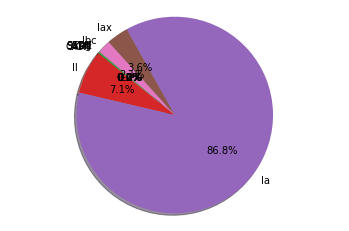

In [36]:
plt.pie(freq, labels=sntype,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [45]:
types_wfd = np.array([SNANA_names[item] for item in data_all_wfd2['SIM_TYPE_INDEX'].values])
sntype, freq = np.unique(types_wfd, return_counts=True)

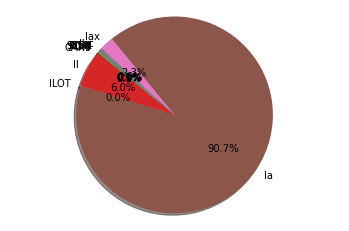

In [46]:
plt.pie(freq, labels=sntype,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Kyle results - DDF

In [35]:
fname_ddf = '/media/kara/resspect_metric/workspace/kyle_boone_ddf.csv'

kyle_ddf = pd.read_csv(fname_ddf, names=['object_id','6','15','16','42','52','53','62','64','65','67','88',
                                           '90','92','95'], skiprows=1)

In [36]:
class_final = []

for i in range(kyle_ddf.shape[0]):
    indx = np.argsort(kyle_ddf.iloc[i].values[1:])[-1]
    code = int(kyle_ddf.keys()[indx + 1])
    class_final.append(types_names[code])
    
class_final = np.array(class_final)
flag_class_Ia = class_final == 'Ia'
kyle_ddf_Ia = kyle_ddf[flag_class_Ia]

In [66]:
k = 5
np.random.seed(k)
kyle_ddf_sample = kyle_ddf_Ia.sample(n=3000, replace=False)

In [67]:
fitres_ddf_flag = np.array([item in kyle_ddf_sample['object_id'].values 
                            for item in all_fitres['CID'].values])

In [68]:
sum(fitres_ddf_flag)

3000

In [69]:
kyle_fitres_ddf = all_fitres[fitres_ddf_flag]


In [70]:
ids, freq = np.unique(kyle_fitres_ddf['CID'].values, return_counts=True)
sum(freq > 1 )

0

In [71]:
kyle_fitres_ddf.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/emille_samples' + str(k) + '/fiducial3000.csv', index=False)
kyle_fitres_ddf.to_csv('/media/emille/git/COIN/RESSPECT_work/PLAsTiCC/metrics_paper/resspect_metric/SALT2_fit/DDF' + str(k) + '/fiducial3000.csv', index=False)

In [72]:
sum(kyle_fitres_ddf['SIM_TYPE_INDEX'].values == 11)

2871

# Kyle results - WFD

In [82]:
np.random.seed(750)

In [83]:
fname_wfd = '/media/kara/resspect_metric/workspace/kyle_boone_wfd.csv'

kyle_wfd = pd.read_csv(fname_wfd, names=['object_id','6','15','16','42','52','53','62','64','65','67','88',
                                           '90','92','95'], skiprows=1)

In [84]:
class_final = []

for i in range(kyle_wfd.shape[0]):
    indx = np.argsort(kyle_wfd.iloc[i].values[1:])[-1]
    code = int(kyle_wfd.keys()[indx + 1])
    class_final.append(types_names[code])
    
class_final = np.array(class_final)
flag_class_Ia = class_final == 'Ia'
kyle_wfd_Ia = kyle_wfd[flag_class_Ia]

In [85]:
kyle_wfd_sample = kyle_wfd_Ia.sample(n=3000, replace=False)

In [86]:
fitres_wfd_flag = np.array([item in kyle_wfd_sample['object_id'].values for item in data_all_wfd2['CID'].values])

In [87]:
sum(fitres_wfd_flag)

3003

In [88]:
kyle_fitres_wfd = data_all_wfd2[fitres_wfd_flag]
kyle_fitres_wfd2 = kyle_fitres_wfd.drop_duplicates(subset=['CID'], keep='first')

In [89]:
ids, freq = np.unique(kyle_fitres_wfd2['CID'].values, return_counts=True)
sum(freq > 1 )

0

In [90]:
k = 5
kyle_fitres_wfd2.to_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/emille_samples' + str(k) + '/fiducial3000.csv', 
                        index=False)

In [91]:
kyle_fitres_wfd2.to_csv('/media/emille/git/COIN/RESSPECT_work/PLAsTiCC/metrics_paper/resspect_metric/SALT2_fit/WFD' + str(k) + '/fiducial3000.csv', index=False)

In [92]:
sum(kyle_fitres_wfd2['SIM_TYPE_INDEX'].values == 11)/3000

0.9743333333333334